<h1>Basic Data Analysis on Titanic Dataset</h1>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Load Data</h2>

In [136]:
df = pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>Perform Data Quality Checks</h2>

In [137]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<strong>The dataset contains 891 entries and a total of 12 columns. Most columns are non-null except for "Age", "Cabin" and "Embarked", which have missing values.</strong>

In [139]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<strong>The max Fare is 512 while the median is 14. This suggests the presence of a few very high-paying passengers, which could skew analysis.
Pclass values range from 1 to 3 but mean around 2.3 suggests more passengers were in lower classes.
SibSp and Parch mostly hover near 0, so many passengers traveled alone.</strong>

In [140]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h2>Perform Data Transformations</h2>

<strong>The "PassengerId" column is removed to clean out unnecessary data.</strong>

In [141]:
df = df.drop("PassengerId", axis = 1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<strong>The "Cabin" column is removed due to too many missing values. (687 values are missing)</strong>

In [142]:
df = df.drop("Cabin", axis = 1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<strong>The "Age" column is missing 177 values. They will be filled with the median age value.</strong>

In [130]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<strong>The "Embarked" column is missing 2 values. They will be filled with the most frequent embarked value.</strong>

In [144]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<strong>Additional column "AgeGroup" is added to bin the data into categories and use it for future comparisons by age segment. </strong>

In [145]:
bins = [0, 12, 18, 35, 60, 99]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels = labels)

col = df.pop("AgeGroup")
df.insert(6, col.name, col)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,AgeGroup,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,Young Adult,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,Adult,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,Young Adult,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,Young Adult,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,Young Adult,0,373450,8.0500,S


<strong>The "Sex" Category is encoded as numeric for improvement in further analysis.</strong>

In [146]:
df["Sex"] = df["Sex"].map({"male" : 0, "female" : 1})

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,AgeGroup,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,Young Adult,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,Adult,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,Young Adult,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,Young Adult,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,Young Adult,0,373450,8.0500,S


<strong>Additional column "FamilySize" is added that equals the sum of "Parch" and "SibSp" and replaces them.</strong>

In [147]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

col = df.pop("FamilySize")
df.insert(8, col.name, col)

df = df.drop("SibSp", axis = 1)
df = df.drop("Parch", axis = 1)

df.head()

,Survived,Pclass,Name,Sex,Age,AgeGroup,FamilySize,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,Young Adult,2,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,Adult,2,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,Young Adult,1,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,Young Adult,2,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,Young Adult,1,373450,8.0500,S


<h2>Perform Data Analysis and Visualization</h2>

<strong>Analyze and visualize the reationship between sex and survival.</strong>

In [152]:
df.groupby("Sex")["Survived"].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

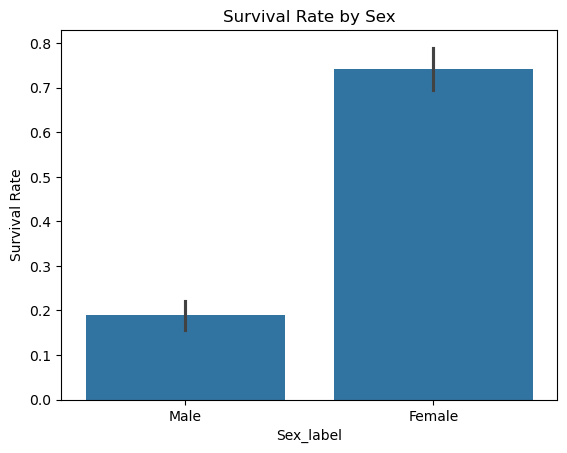

In [153]:
df['Sex_label'] = df['Sex'].map({0: 'Male', 1: 'Female'})

sns.barplot(x='Sex_label', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

<strong>Conclusion: The analysis clearly shows that survival rate for females was significantly higher than for males. A significant factor is that women were prioritized during evacuation. Thus, gender was a strong indicator of survival on the Titanic.</strong>

<strong>Analyze and visualize the relationship between age group and survival.</strong>

AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.382682
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


<Axes: title={'center': 'Survival Rate by Age Group'}, xlabel='AgeGroup'>

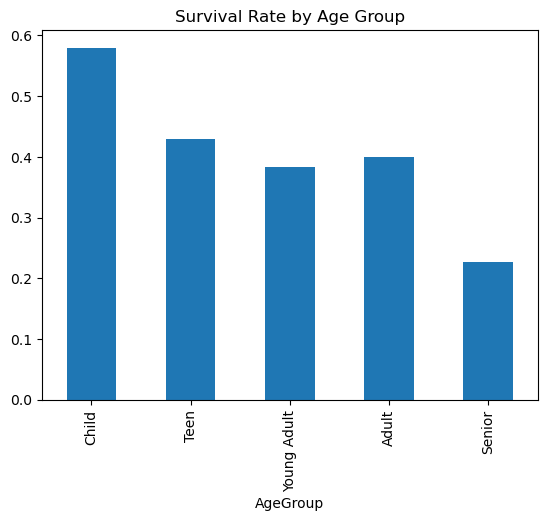

In [162]:
age_group_survival = df.groupby("AgeGroup", observed=True)["Survived"].mean()
print(age_group_survival)
age_group_survival.plot(kind='bar', title='Survival Rate by Age Group')

<strong>Conclusion: Children had the highest survival rate among all. Teens, Young Adults and Adults had fairly similar survival rates, suggesting that age alone was not a strong determinant in those categories. Seniors had the lowest survival rate which may be due to physical limitations or social prioritization.</strong>

<strong>Analyze relationship between age group, sex and survival rate. Visualize results using a heatmap with cross-tabulation of Age Group and Sex, showing the average survival rate for each combination.</strong>

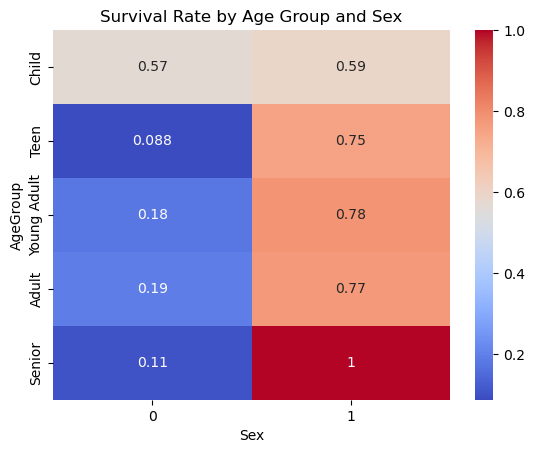

In [161]:
pivot = pd.crosstab(index=df['AgeGroup'], columns=df['Sex'], values=df['Survived'], aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Survival Rate by Age Group and Sex')
plt.show()

<strong>Conclusion: Across all age groups, females consistently had much higher survival rates. Male survival rates were notably lower, especially for teens and seniors, further reinforcing the "woman and children first" rescue pattern. An outlier is that senior females had a 100% survival rate although this might be due to a very small sample size.</strong>

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


<Axes: title={'center': 'Survival Rate by Family Size'}, xlabel='FamilySize'>

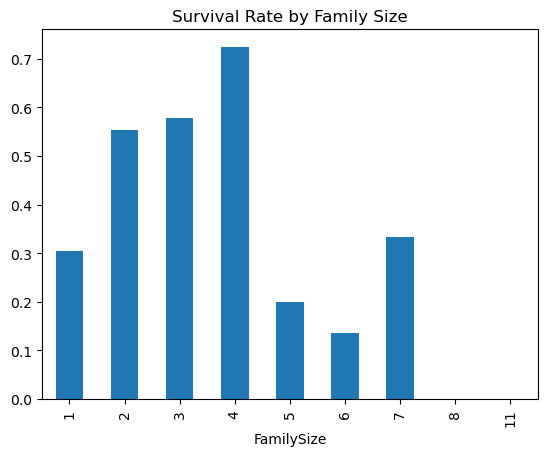

In [158]:
family_survival = df.groupby('FamilySize')['Survived'].mean()
print(family_survival)
family_survival.plot(kind='bar', title='Survival Rate by Family Size')

<strong>Solo travelers had a fairly low survival rate of 30%, suggesting that being alone may have been a disadvantage during the chaos of evacuation. Passengers with small to medium-sized families (2–4 members) had the highest survival rates, peaking at around 70%. Large families (5+ members) experienced dramatically lower survival rates, possibly due to the difficulty of staying together or slower decision-making in large groups. Overall, the data suggests that moderate family size offered the best chance of survival, likely balancing emotional support and logistical mobility during evacuation.
</strong>